In [1]:
# Load most common libraries

import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
#import gc
import seaborn as sns


In [ ]:
# load data from website
data = pd.read_csv('https://jakubmichalak.com.pl/flat.csv', delimiter=";", decimal=",")

# # explore data
# print(data.head())

# # explore data types
# data.dtypes

    data_tran  kond  rok_bud  obreb        adres  miej_post  pom_dod    cena  \
0  2021-01-25     2     2019     27  ŻYRARDOWSKA          0        0  403000   
1  2021-01-07     1     2000     27     BAŁTYCKA          0        1  295000   
2  2021-01-04     2     1950     23   PILECKIEGO          0        1  240000   
3  2021-01-08     4     2015     22     BAŁTYCKA          1        0  290000   
4  2021-01-08     2     2014     16  NARUTOWICZA          1        0  350000   

     pow  
0  56.15  
1  46.95  
2  43.40  
3  44.70  
4  50.46  


data_tran     object
kond           int64
rok_bud        int64
obreb          int64
adres         object
miej_post      int64
pom_dod        int64
cena           int64
pow          float64
dtype: object

In [52]:
# convert string to date
data['data_tran'] = pd.to_datetime(data['data_tran'], format='%Y-%m-%d')

# convert integer to string
data['kond'] = [str(x) for x in data['kond']]

# add new target column
prices_unit = data['cena'] / data['pow']
data['unitprice'] = [int(x) for x in prices_unit]
data['wiek'] = 2021 - data['rok_bud']  

In [ ]:
data2 = pd.DataFrame (data['data_tran'].dt.month)
data2['unitprice'] = data['unitprice']

index = pd.DataFrame(data2.groupby('data_tran').mean())

print(index['unitprice'][1])

data2['unitpricebeta'] = data2['unitprice']

index_mt = [0] * 12
# indes = pd.DataFrame(index)

for i in range(12):
    index_mt[i] = index['unitprice'][i+1] / index['unitprice'][12] 
    

data2['unitpricebeta'] = data2['unitprice']

for i in range(len(data2)):
    data2['unitpricebeta'][i] = data2['unitprice'][i] / index[data2['data_tran'][i]-1]
        
# data2['unitpricebeta'] = [int(x) for x in data2['unitpricebeta']]

print(data2)

6340.909090909091
     data_tran  unitprice  unitpricebeta
0            1       7177           7177
1            1       6283           6283
2            1       5529           5529
3            1       6487           6487
4            1       6936           6936
..         ...        ...            ...
139         12       7810           7810
140         12       8878           8878
141         12       6975           6975
142         12       6000           6000
143         12       6060           6060

[144 rows x 3 columns]


In [ ]:
import pandas as pd

# Upewnij się, że data_tran jest typu datetime
data['data_tran'] = pd.to_datetime(data['data_tran'], errors='coerce')

# Utwórz kolumnę z miesiącem
data['month'] = data['data_tran'].dt.month

# Oblicz średnią cenę jednostkową (unitprice) dla każdego miesiąca
index = data.groupby('month')['unitprice'].mean()

# Utwórz indeks sezonowy na podstawie ostatniego miesiąca (np. grudzień)
index_mt = index / index[12]

# Dodaj kolumnę z `unitpricebeta` w oparciu o indeksy sezonowe
data['unitprice'] = data.apply(
    lambda row: row['unitprice'] / index_mt[row['month']] if pd.notna(row['month']) else None, 
    axis=1
)

print(data)


     data_tran kond  rok_bud  obreb        adres  miej_post  pom_dod    cena  \
0   2021-01-25    2     2019     27  ŻYRARDOWSKA          0        0  403000   
1   2021-01-07    1     2000     27     BAŁTYCKA          0        1  295000   
2   2021-01-04    2     1950     23   PILECKIEGO          0        1  240000   
3   2021-01-08    4     2015     22     BAŁTYCKA          1        0  290000   
4   2021-01-08    2     2014     16  NARUTOWICZA          1        0  350000   
..         ...  ...      ...    ...          ...        ...      ...     ...   
139 2021-12-22    3     2012     33       3 MAJA          1        0  535000   
140 2021-12-11    1     2003     34       TELIGI          0        1  285000   
141 2021-12-02    1     2000     27     BAŁTYCKA          0        1  200000   
142 2021-12-07    3     1985     28   KOŚCIUSZKI          0        1  330000   
143 2021-12-17    5     1976     41   WÓLCZYŃSKA          0        1  180000   

       pow  unitprice  wiek  month  uni

In [85]:

stats = data.groupby('month')['unitprice'].agg(['mean', 'std']).reset_index()

stats['upper_limit'] = stats['mean'] + 1 * stats['std']
stats['lower_limit'] = stats['mean'] - 1 * stats['std']

data = data.merge(stats[['month', 'upper_limit', 'lower_limit']], on='month', how='left')

filtered_data = data[
    (data['unitprice'] >= data['lower_limit']) & 
    (data['unitprice'] <= data['upper_limit'])
].copy()

filtered_data.drop(columns=['upper_limit', 'lower_limit'], inplace=True)
data.drop(columns=['upper_limit', 'lower_limit'], inplace=True)

# Wyświetl przefiltrowane dane
print(filtered_data)


     data_tran kond  rok_bud  obreb         adres  miej_post  pom_dod    cena  \
1   2021-01-07    1     2000     27      BAŁTYCKA          0        1  295000   
3   2021-01-08    4     2015     22      BAŁTYCKA          1        0  290000   
6   2021-01-29    1     2006     34       RUSAŁKI          0        1  369000   
8   2021-01-27    2     2007     34   CEGIELNIANA          0        1  315000   
9   2021-01-18    2     1978     28  SIENKIEWICZA          0        1  325000   
..         ...  ...      ...    ...           ...        ...      ...     ...   
135 2021-11-25    5     2003     41    WÓLCZYŃSKA          0        1  370000   
137 2021-12-15    4     1975     64      BAŁTYCKA          0        1  275000   
139 2021-12-22    3     2012     33        3 MAJA          1        0  535000   
140 2021-12-11    1     2003     34        TELIGI          0        1  285000   
141 2021-12-02    1     2000     27      BAŁTYCKA          0        1  200000   

       pow  unitprice  wiek

In [ ]:
data.drop(columns=['upper_limit', 'lower_limit'], inplace=True)

In [31]:
data3 = pd.DataFrame(data['data_tran'].dt.month, columns=['month'])
data3['liczba'] = data['data_tran'].dt.month.value_counts().sort_index().values


# data2.groupby(data['data_tran'].dt.month).count()

In [84]:
data

,data_tran,kond,rok_bud,obreb,adres,miej_post,pom_dod,cena,pow,unitprice,wiek,month,unitpricebeta
0,2021-01-25,2,2019,27,ŻYRARDOWSKA,0,0,403000,56.15,7177,2,1,8964.870444
1,2021-01-07,1,2000,27,BAŁTYCKA,0,1,295000,46.95,6283,21,1,7848.165111
2,2021-01-04,2,1950,23,PILECKIEGO,0,1,240000,43.40,5529,71,1,6906.335333
3,2021-01-08,4,2015,22,BAŁTYCKA,1,0,290000,44.70,6487,6,1,8102.983778
4,2021-01-08,2,2014,16,NARUTOWICZA,1,0,350000,50.46,6936,7,1,8663.834667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2021-12-22,3,2012,33,3 MAJA,1,0,535000,68.50,7810,9,12,7810.000000
140,2021-12-11,1,2003,34,TELIGI,0,1,285000,32.10,8878,18,12,8878.000000
141,2021-12-02,1,2000,27,BAŁTYCKA,0,1,200000,28.67,6975,21,12,6975.000000
142,2021-12-07,3,1985,28,KOŚCIUSZKI,0,1,330000,55.00,6000,36,12,6000.000000


In [17]:
data['month'] = data['data_tran'].dt.month
data3 = data['month'].value_counts().sort_index().reset_index()
data3.columns = ['month', 'liczba']


In [88]:
data3 = filtered_data['month'].value_counts().sort_index().reset_index()
data3.columns = ['month', 'liczba']


<Axes: xlabel='month'>

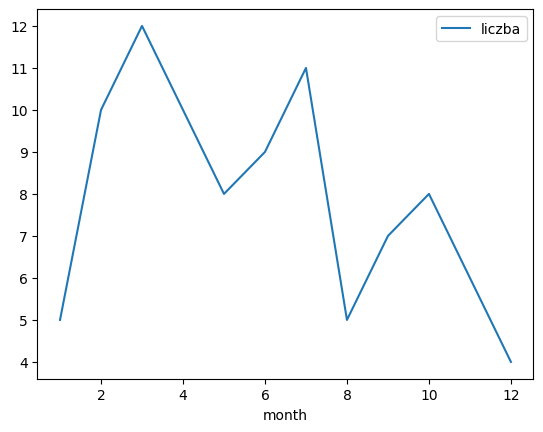

In [89]:
data3.plot(x = 'month', y = 'liczba')

<Axes: xlabel='data_tran'>

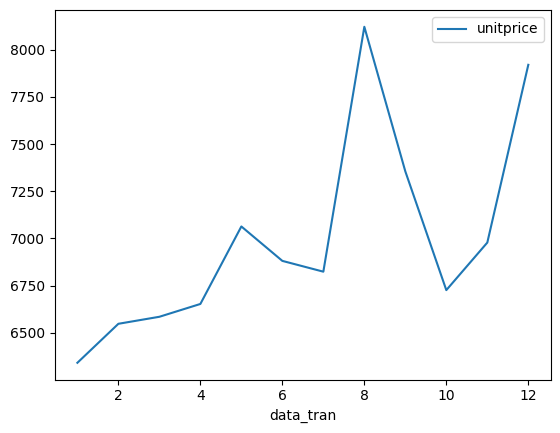

In [23]:
indes.plot()

In [33]:
indes

,unitprice
data_tran,
1,6340.909091
2,6547.600000
3,6584.800000
4,6652.733333
5,7063.583333
6,6881.076923
7,6823.882353
8,8122.125000
9,7355.538462


In [ ]:
indes = pd.DataFrame(data2.groupby('data_tran').mean())

print(indes['unitprice'][1])

data2['unitpricebeta'] = data2['unitprice']

6340.909090909091


In [55]:
index = [0] * 12
# indes = pd.DataFrame(index)

for i in range(12):
    index[i] = indes['unitprice'][i+1] / indes['unitprice'][12] 

In [57]:
print(index)

[0.8005692937199786, 0.8266649832712581, 0.8313616564610821, 0.8399385560675884, 0.8918102813374577, 0.8687679973583641, 0.8615469166013732, 1.025456094943501, 0.9286709755114528, 0.8492014393030743, 0.881023023438275, 1.0]


In [56]:
data2['unitpricebeta'] = data2['unitprice']

for i in range(len(data2)):
        data2['unitpricebeta'][i] = data2['unitprice'][i] / index[data2['data_tran'][i]-1]
     

/tmp/ipykernel_3081/629380333.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data2['unitpricebeta'][i] = data2['unitprice'][i] / index[data2['data_tran'][i]-1]
/tmp/ipykernel_3081/629380333.py:4: SettingWithCopyWarning: 
A value is tryi

In [37]:
display(data2)

,data_tran,unitprice,unitpricebeta
0,1,7177,8964.870444
1,1,6283,7848.165111
2,1,5529,6906.335333
3,1,6487,8102.983778
4,1,6936,8663.834667
...,...,...,...
139,12,7810,7810.000000
140,12,8878,8878.000000
141,12,6975,6975.000000
142,12,6000,6000.000000


In [38]:
data2['unitpricebeta'] = [int(x) for x in data2['unitpricebeta']]
# index[0]

In [39]:
data2['data'] = data['data_tran']

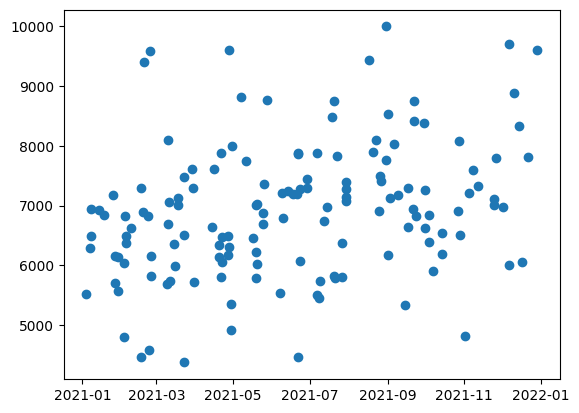

In [40]:
plt.scatter(data2['data'], data2['unitprice'])
plt.show()

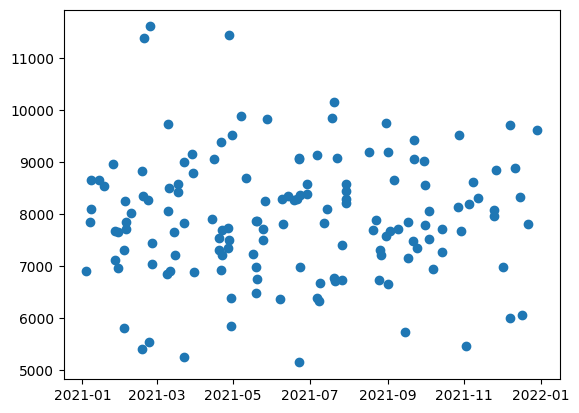

In [41]:
plt.scatter(data2['data'], data2['unitpricebeta'])
plt.show()

In [42]:
data2.groupby('data_tran').mean()['unitpricebeta']

data_tran
1     7920.000000
2     7920.000000
3     7920.066667
4     7919.933333
5     7919.916667
6     7919.923077
7     7920.058824
8     7920.125000
9     7920.000000
10    7920.000000
11    7919.857143
12    7920.500000
Name: unitpricebeta, dtype: float64

In [43]:
data['unitprice'] = data2['unitpricebeta']

In [18]:
pr1 = data['unitprice'][data['miej_post']==1]
pr2 = data['unitprice'][data['miej_post']==0]

In [19]:
pr1.mean()

8710.05

In [20]:
from scipy import stats

stats.ttest_ind(pr1, pr2)

TtestResult(statistic=3.359698103104161, pvalue=0.0010022226827429523, df=142.0)

In [21]:
import scipy.stats
scipy.stats.t.ppf(q=1-.05/2,df=142)

1.9768109936200895

0.014659709931858847 7919.933587698533


/tmp/ipykernel_4064/2635839658.py:27: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = np.linalg.lstsq(A, y)[0]


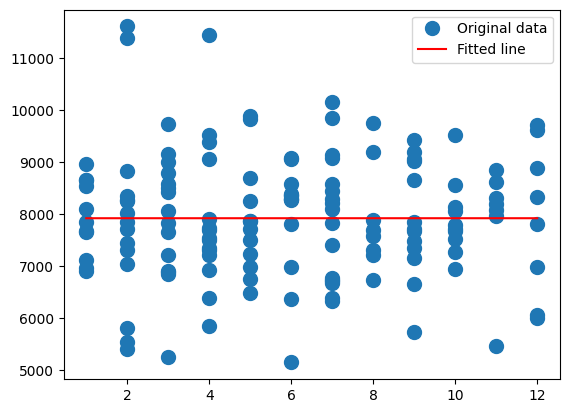

In [71]:
# convert date to month

# data2['mc'] = data2['data_tran'].apply(lambda date:date.month)

# convert to numpy array to use with polyfit

x = np.array(data2['data_tran'])
y = np.array(data2['unitpricebeta'])

A = np.vstack([x, np.ones(len(x))]).T

# WYKRES CEN POSZCZEGÓLNYCH MIESIĄCACH

#plt.scatter(data['mc'],data['unitprice'], c=data['unitprice'])

# data2.groupby('data_tran').mean()['unitpricebeta'].plot()
# plt.suptitle('Trend czasowy')
# plt.ylabel('Cena jednostkowa')
# plt.xlabel('Miesiąc')

#add trend line

# z = np.polyfit(x,y,1) #coeff
# p = np.poly1d(z)
# plt.plot(x,p(x))

m, c = np.linalg.lstsq(A, y)[0]

print(m, c)

import matplotlib.pyplot as plt

_ = plt.plot(x, y, 'o', label='Original data', markersize=10)

_ = plt.plot(x, m*x + c, 'r', label='Fitted line')

_ = plt.legend()

plt.show()


# check r squared
# corrtt = np.corrcoef(x, y)[0,1]
# r_qrt_tt = corrtt**2
# print (r_qrt_tt)

In [43]:
import numpy as np

# Większy zbiór danych z większą entropią
# np.random.seed(56)  # Dla powtarzalności wyników
N = 10  # Liczba obserwacji

# Generowanie danych
binary_variable_large = np.random.choice([0, 1], size=N, p=[0.5, 0.5])  # Zmienna binarna (równy podział 0 i 1)
continuous_variable_large = np.random.normal(loc=500000, scale=50000, size=N)  # Ceny mieszkań z większą wariancją

continuous_variable_large[binary_variable_large == 1] = continuous_variable_large[binary_variable_large == 1] + 40000

# Obliczenie statystyk dla większego zbioru danych
X1_mean_large = continuous_variable_large[binary_variable_large == 1].mean()  # Średnia dla grupy 1 (balkon)
X0_mean_large = continuous_variable_large[binary_variable_large == 0].mean()  # Średnia dla grupy 0 (brak balkonu)
std_dev_large = continuous_variable_large.std()  # Odchylenie standardowe zmiennej ciągłej

p_large = binary_variable_large.mean()  # Proporcja grupy z wartością 1
q_large = 1 - p_large  # Proporcja grupy z wartością 0

# Obliczenie współczynnika punktowo-biserialnego
r_pb_large = (X1_mean_large - X0_mean_large) / std_dev_large * np.sqrt(p_large * q_large / N)

# Wyniki
X1_mean_large, X0_mean_large, std_dev_large, r_pb_large


(543670.01993058, 487607.0360949122, 47096.71431914255, 0.18821559413312922)

In [37]:
print (continuous_variable_large[binary_variable_large == 1])
print(continuous_variable_large[binary_variable_large == 1] + 20000)

# continuous_variable_large[binary_variable_large == 1] = continuous_variable_large[binary_variable_large == 1] + 20000
# binary_variable_large

[540778.45907594 660380.79345397 575212.58199178 468749.82984878
 585750.85244294 470737.65012662 569600.9945145  699483.8715243
 626779.71459598 593834.43801877 593084.55072948 647674.92583973
 654427.45502778 575978.57767339 618789.6866287  540680.47920607
 522696.45310244 551965.44775659 580082.49210289 630990.57006841
 549324.39471765 556968.2714928  573970.94198271 626697.71326646
 603954.76615855 579476.26436696 598647.8826808  461719.81676117
 513340.52598346 566580.61127289 557260.731822   622774.25297981
 566338.77297337 490077.96592542 633244.56958303 651651.81716831
 548287.19741052 529758.08643363 626086.15157418 621787.48337403
 668097.3819473  629689.72357282 514700.10219443 621943.36174975
 592194.84246414 473340.95565947 516164.30445035 557083.31758817]
[560778.45907594 680380.79345397 595212.58199178 488749.82984878
 605750.85244294 490737.65012662 589600.9945145  719483.8715243
 646779.71459598 613834.43801877 613084.55072948 667674.92583973
 674427.45502778 595978.57

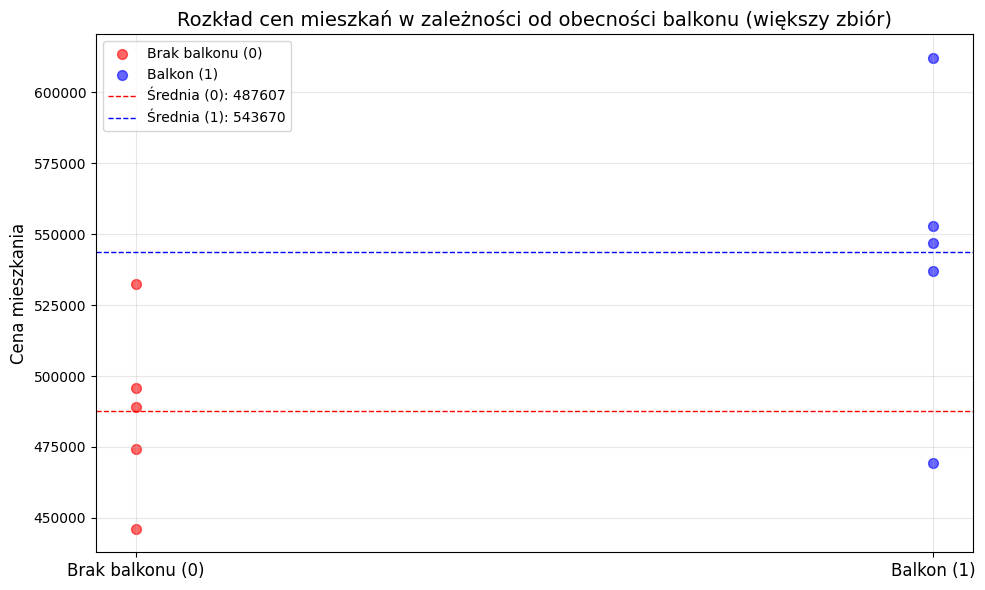

In [44]:
import matplotlib.pyplot as plt

# Wizualizacja dla większego zbioru danych
plt.figure(figsize=(10, 6))

# Rozdzielenie danych na grupy 0 i 1
group_0_large = continuous_variable_large[binary_variable_large == 0]
group_1_large = continuous_variable_large[binary_variable_large == 1]

# Tworzenie wykresu
plt.scatter(np.zeros_like(group_0_large), group_0_large, color='red', label='Brak balkonu (0)', s=50, alpha=0.6)
plt.scatter(np.ones_like(group_1_large), group_1_large, color='blue', label='Balkon (1)', s=50, alpha=0.6)

# Linie średnich
plt.axhline(y=X0_mean_large, color='red', linestyle='--', linewidth=1, label=f'Średnia (0): {X0_mean_large:.0f}')
plt.axhline(y=X1_mean_large, color='blue', linestyle='--', linewidth=1, label=f'Średnia (1): {X1_mean_large:.0f}')

# Ustawienia osi i tytułu
plt.xticks([0, 1], ['Brak balkonu (0)', 'Balkon (1)'], fontsize=12)
plt.ylabel('Cena mieszkania', fontsize=12)
plt.title('Rozkład cen mieszkań w zależności od obecności balkonu (większy zbiór)', fontsize=14)
plt.legend(fontsize=10, loc='best')

# Pokazanie wykresu
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Wykres zapisano jako cykl_analizy_danych.png


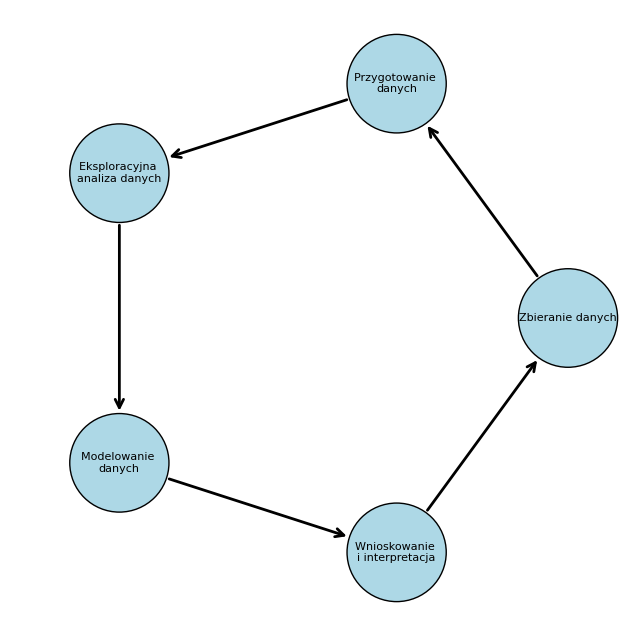

In [30]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Circle
import numpy as np

# Funkcja do rysowania strzałek
def draw_arrow(ax, start, end, radius=0.08, color="black"):
    # Obliczamy wektor przesunięcia w stronę środka okręgu
    vector = np.array(end) - np.array(start)
    length = np.linalg.norm(vector)
    direction = vector / length  # Wektor jednostkowy
    start_offset = np.array(start) + direction * radius
    end_offset = np.array(end) - direction * radius
    arrow = FancyArrowPatch(
        start_offset, end_offset, 
        arrowstyle="->", 
        color=color, 
        linewidth=2, 
        mutation_scale=15
    )
    ax.add_patch(arrow)

# Etapy cyklu analizy danych
steps = [
    "Zbieranie danych",
    "Przygotowanie \ndanych",
    "Eksploracyjna \nanaliza danych",
    "Modelowanie \ndanych",
    "Wnioskowanie \ni interpretacja",
]

# Tworzenie układu kołowego dla pozycji
angles = np.linspace(0, 2 * np.pi, len(steps), endpoint=False)
positions = [(0.5 + 0.4 * np.cos(angle), 0.5 + 0.4 * np.sin(angle)) for angle in angles]

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Rysowanie etapów
for step, pos in zip(steps, positions):
    circle = Circle(pos, 0.08, color='lightblue', ec='black', zorder=2)
    ax.add_patch(circle)
    ax.text(pos[0], pos[1], step, fontsize=8, ha='center', va='center', zorder=3)

# Dodawanie strzałek między etapami
for i in range(len(positions)):
    start = positions[i]
    end = positions[(i + 1) % len(positions)]  # Następny etap, cyklicznie
    draw_arrow(ax, start, end)

# Zapis do pliku
output_file = "cykl_analizy_danych.png"
plt.savefig(output_file, dpi=300, bbox_inches="tight")
print(f"Wykres zapisano jako {output_file}")
plt.show()


In [31]:
from scipy import stats

# Przykładowe dane: ceny dla dwóch grup nieruchomości
mala_grupa = [350, 380, 400, 420, 450]
duza_grupa = [600, 650, 700, 750, 800]

# Test t-Studenta
t_stat, p_value = stats.ttest_ind(mala_grupa, duza_grupa)

print(f"Statystyka t: {t_stat}")
print(f"Wartość p: {p_value}")


Statystyka t: -7.644707871564384
Wartość p: 6.046839317164572e-05


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Dane przykładowe: cechy i ceny nieruchomości
data = {
    "Cena": [300000, 320000, 310000, 330000, 350000],
    "Metraż": [50, 55, 53, 60, 65],
    "Liczba pokoi": [2, 3, 2, 3, 4],
    "Odległość od centrum": [10, 8, 9, 7, 5]
}

# Tworzymy DataFrame
df = pd.DataFrame(data)

# Lista cech do analizy (bez ceny)
features = ["Metraż", "Liczba pokoi", "Odległość od centrum"]

# Obliczanie korelacji i wartości p
correlations = {}
for feature in features:
    r, p = pearsonr(df[feature], df["Cena"])
    correlations[feature] = {"correlation": r, "p_value": p}

# Filtrujemy tylko istotne korelacje (p < 0.05)
significant_features = {
    feature: abs(info["correlation"]) for feature, info in correlations.items() if info["p_value"] < 0.05
}

# Normalizacja wag
if significant_features:
    total = sum(significant_features.values())
    weights = {feature: value / total for feature, value in significant_features.items()}
else:
    weights = {}

# Wyniki
print("Korelacje i istotność:")
print(pd.DataFrame(correlations).T)

print("\nWagi cech (normalizowane):")
print(weights)


Korelacje i istotność:
                      correlation   p_value
Metraż                   0.993134  0.000682
Liczba pokoi             0.963123  0.008454
Odległość od centrum    -1.000000  0.000000

Wagi cech (normalizowane):
{'Metraż': 0.3359429322080066, 'Liczba pokoi': 0.32579144645930336, 'Odległość od centrum': 0.33826562133269}


In [84]:
transaction_counts = flat_data['obreb'].value_counts()

transaction_counts

# data = data.dropna(subset=['unitprice'])

# data['unitprice'] = pd.to_numeric(data['unitprice'], errors='coerce')
# print(type(data))


# means = pd.DataFrame(data, columns = ['obreb', 'unitprice'])

# print(data['unitprice'].to_string())

# means['counts'] = means.groupby('obreb')['unitprice'].transform('mean')
# data

data.groupby(['obreb'])['unitprice'].mean()

obreb
12    9065.500000
14    7607.500000
16    8220.888889
21    9131.500000
22    9773.333333
23    7080.166667
24    8516.666667
27    7852.230769
28    7699.769231
29    7854.000000
30    7791.750000
31    7359.666667
32    8980.500000
33    7852.444444
34    8000.812500
41    7729.375000
42    7051.000000
43    7351.500000
44    9375.000000
53    9607.000000
55    7798.333333
60    7698.000000
62    7513.000000
64    8333.000000
Name: unitprice, dtype: float64

In [125]:
from PIL import Image, ImageDraw, ImageFont
import pandas as pd

# Wczytaj dane
flat_data = pd.read_csv('https://jakubmichalak.com.pl/flat.csv', delimiter=";", decimal=",")

# Grupowanie danych według obrębów
transaction_counts = flat_data['obreb'].value_counts()
# transaction_counts = data.groupby('obreb').mean()['unitprice']

# Wczytaj mapę
map_path = '/home/jakub/Downloads/obreby_grodzisk.png'
# map_path = 'https://jakubmichalak.com.pl/obreby_grodzisk.png'
map_image = Image.open(map_path)

width = map_image.size[0] 
height = map_image.size[1] 
for i in range(0,width):# process all pixels
    for j in range(0,height):
        data_p = map_image.getpixel((i,j))
        if data_p[0] > 249 and data_p[1] < 90 and data_p[2] > 110 :
            map_image.putpixel((i,j),(0, 0, 0))
        # if data[2] < 50:
        #     map_image.putpixel((i,j),(255, 255, 255))
        else :
            map_image.putpixel((i,j),(255, 255, 255))

# map_image.show()



draw = ImageDraw.Draw(map_image)

# draw.text((40,40), '20', fill='blue')

myFont = ImageFont.truetype('calibri-regular.ttf', 14)

print (list(map_image.size))

# Współrzędne obrębów (należy uzupełnić dla każdego obrębu)
coords = {
    33: (565, 174),
    41: (317, 394),
    34: (580, 213),
    27: (289, 340),
    28: (396, 319),
    23: (300, 300),
    31: (484, 254),
    16: (184, 255),
    12: (351, 199),
    30: (456, 281),
    24: (351, 301),
    55: (263, 496),
    22: (257, 329),
    42: (340, 362),
    62: (634, 406),
    32: (517, 236),
    14: (547, 148),
    21: (223, 357),
    43: (386, 381),
    44: (465, 369),
    29: (426, 294),
    60: (427, 405),
    53: (715, 256),
    64: (738, 347),
    
    # Dodaj współrzędne dla innych obrębów...
}

rank1 = (253,231,37)
rank2 = (173,220,48)
rank3 = (94,201,98)
rank4 = (40,174,128)
rank5 = (33,145,140)
rank6 = (44,114,142)
rank7 = (59,82,139)
rank8 = (71,45,123)
rank9 = (68,1,84)

viridis = {
18:(253,231,37),
17:(253,231,37),
16:(173,220,48),
15:(173,220,48),
14:(94,201,98),
13:(94,201,98),
12:(40,174,128),
11:(40,174,128),
10:(33,145,140),
9:(33,145,140),
8:(44,114,142),
7:(44,114,142),
6:(59,82,139),
5:(59,82,139),
4:(71,45,123),
3:(71,45,123),
2:(68,1,84),
1:(68,1,84)
}

# ImageDraw.floodfill(map_image, (528,198), rank1, thresh = 300)
# ImageDraw.floodfill(map_image, (204,330), rank1, thresh = 300)

# Dodaj liczby transakcji na mapę
for obreb, count in transaction_counts.items():
    if obreb in coords:
        x, y = coords[obreb]
        # viridis.get(count)
        ImageDraw.floodfill(map_image, (x,y), viridis.get(count), thresh = 25)
        # if count < 6:
        #     ImageDraw.floodfill(map_image, (x,y), rank4, thresh = 25)
        # if count < 10 and count > 5:
        #     ImageDraw.floodfill(map_image, (x,y), rank3, thresh = 25)
        # if count < 15 and count > 9:
        #     ImageDraw.floodfill(map_image, (x,y), rank2, thresh = 25)
        # if count > 14:
        #     ImageDraw.floodfill(map_image, (x,y), rank1, thresh = 25)
           
        draw.text((x, y), str(count), font = myFont , fill=(255,255,255), align="center")

# Zapisz mapę z naniesionymi danymi
output_path = '/home/jakub/Downloads/obreby_grodzisk2.png'
map_image.save(output_path)

map_image.show()


[855, 628]


In [90]:
type(transaction_means)

pandas.core.series.Series

In [22]:
from PIL import Image, ImageDraw, ImageFont
import pandas as pd

# Wczytaj dane
flat_data = pd.read_csv('https://jakubmichalak.com.pl/flat.csv', delimiter=";", decimal=",")

# Grupowanie danych według obrębów
# transaction_counts = flat_data['obreb'].value_counts()
# transaction_counts = means.groupby('obreb').mean()['unitprice']

transaction_means = data.groupby(['obreb'])['unitprice'].mean()

# Wczytaj mapę
map_path = '/home/jakub/Downloads/obreby_grodzisk.png'
# map_path = 'https://jakubmichalak.com.pl/obreby_grodzisk.png'
map_image = Image.open(map_path)

width = map_image.size[0] 
height = map_image.size[1] 
for i in range(0,width):# process all pixels
    for j in range(0,height):
        data_px = map_image.getpixel((i,j))
        if data_px[0] > 249 and data_px[1] < 90 and data_px[2] > 110 :
            map_image.putpixel((i,j),(0, 0, 0))
        # if data[2] < 50:
        #     map_image.putpixel((i,j),(255, 255, 255))
        else :
            map_image.putpixel((i,j),(255, 255, 255))

# map_image.show()



draw = ImageDraw.Draw(map_image)

# draw.text((40,40), '20', fill='blue')

myFont = ImageFont.truetype('calibri-regular.ttf', 14)

print (list(map_image.size))

# Współrzędne obrębów (należy uzupełnić dla każdego obrębu)
coords = {
    33: (565, 174),
    41: (317, 394),
    34: (580, 213),
    27: (289, 340),
    28: (396, 319),
    23: (300, 300),
    31: (484, 254),
    16: (184, 255),
    12: (351, 199),
    30: (456, 281),
    24: (351, 301),
    55: (263, 496),
    22: (257, 329),
    42: (340, 362),
    62: (634, 406),
    32: (517, 236),
    14: (547, 148),
    21: (223, 357),
    43: (386, 381),
    44: (465, 369),
    29: (426, 294),
    60: (427, 405),
    53: (715, 256),
    64: (738, 347),
    
    # Dodaj współrzędne dla innych obrębów...
}

rank1 = (253,231,37)
rank2 = (173,220,48)
rank3 = (94,201,98)
rank4 = (40,174,128)
rank5 = (33,145,140)
rank6 = (44,114,142)
rank7 = (59,82,139)
rank8 = (71,45,123)
rank9 = (68,1,84)

viridis = {
18:(253,231,37),
17:(253,231,37),
16:(173,220,48),
15:(173,220,48),
14:(94,201,98),
13:(94,201,98),
12:(40,174,128),
11:(40,174,128),
10:(33,145,140),
9:(33,145,140),
8:(44,114,142),
7:(44,114,142),
6:(59,82,139),
5:(59,82,139),
4:(71,45,123),
3:(71,45,123),
2:(68,1,84),
1:(68,1,84)
}

# ImageDraw.floodfill(map_image, (528,198), rank1, thresh = 300)
# ImageDraw.floodfill(map_image, (204,330), rank1, thresh = 300)

# Dodaj liczby transakcji na mapę
for obreb, unitprice in transaction_means.items():
    if obreb in coords:
        x, y = coords[obreb]
        # viridis.get(count)
        # ImageDraw.floodfill(map_image, (x,y), viridis.get(count), thresh = 25)
        # if count < 6:
        #     ImageDraw.floodfill(map_image, (x,y), rank4, thresh = 25)
        # if count < 10 and count > 5:
        #     ImageDraw.floodfill(map_image, (x,y), rank3, thresh = 25)
        # if count < 15 and count > 9:
        #     ImageDraw.floodfill(map_image, (x,y), rank2, thresh = 25)
        # if count > 14:
        #     ImageDraw.floodfill(map_image, (x,y), rank1, thresh = 25)
           
        draw.text((x, y), str(unitprice), font = myFont , fill=(255,0,0), align="center")

# Zapisz mapę z naniesionymi danymi
output_path = '/home/jakub/Downloads/obreby_grodzisk2.png'
map_image.save(output_path)

map_image.show()


[855, 628]


In [44]:
transaction_means = data.groupby(['obreb'])['unitprice'].agg(['count','mean','median', 'std'])

print(transaction_means)

       count         mean  median          std
obreb                                         
12         8  9065.500000  8933.0   607.762172
14         2  7607.500000  7607.5   146.371104
16         9  8220.888889  8492.0   866.029076
21         2  9131.500000  9131.5   987.828173
22         3  9773.333333  9840.0  1639.017185
23        12  7080.166667  7204.5   824.700258
24         3  8516.666667  8373.0  2849.217846
27        13  7852.230769  7848.0  1016.961172
28        13  7699.769231  7858.0  1143.552663
29         1  7854.000000  7854.0          NaN
30         4  7791.750000  7630.0  1059.688751
31         9  7359.666667  7307.0   775.948935
32         2  8980.500000  8980.5   768.625071
33        18  7852.444444  8150.0  1469.313814
34        16  8000.812500  7888.0   908.069176
41        16  7729.375000  7733.0  1226.062199
42         2  7051.000000  7051.0   106.066017
43         2  7351.500000  7351.5   426.385389
44         1  9375.000000  9375.0          NaN
53         1 

In [45]:
transaction_means = data.groupby(['obreb'])['wiek'].agg(['count','mean','median', 'std'])

print(transaction_means)

       count       mean  median        std
obreb                                     
12         8   7.000000     7.0   0.000000
14         2  17.000000    17.0   5.656854
16         9   9.333333    10.0   2.345208
21         2  18.000000    18.0   0.000000
22         3   6.000000     6.0   0.000000
23        12  39.583333    45.0  18.436418
24         3  25.000000     8.0  32.969683
27        13  15.846154    15.0  18.600386
28        13  44.000000    46.0   3.651484
29         1  13.000000    13.0        NaN
30         4  42.250000    36.0  12.500000
31         9  38.444444    38.0   0.726483
32         2   5.000000     5.0   0.000000
33        18  16.555556    11.0  12.533354
34        16  17.687500    15.5   4.908751
41        16  48.187500    54.5  19.745780
42         2  53.500000    53.5   0.707107
43         2  26.500000    26.5  23.334524
44         1   4.000000     4.0        NaN
53         1   7.000000     7.0        NaN
55         3   3.000000     3.0   0.000000
60         

In [ ]:
# outlier na narutowicza

print(data[(data['obreb'] == 16 ) & (data['adres'] == 'NARUTOWICZA') ])

     data_tran kond  rok_bud  obreb        adres  miej_post  pom_dod    cena  \
4   2021-01-08    2     2014     16  NARUTOWICZA          1        0  350000   
23  2021-03-23    3     2011     16  NARUTOWICZA          0        0  220000   
24  2021-03-11    3     2011     16  NARUTOWICZA          0        0  305000   
81  2021-07-07    2     2014     16  NARUTOWICZA          0        0  180000   
90  2021-07-07    1     2014     16  NARUTOWICZA          0        0  206000   
130 2021-11-12    4     2014     16  NARUTOWICZA          1        1  373000   

       pow  unitprice  wiek  
4    50.46       8663     7  
23   29.40       8999    10  
24   43.20       8492    10  
81   32.72       6385     7  
90   26.16       9139     7  
130  50.96       8307     7  


In [41]:
print(data[(data['obreb'] == 22 )])

    data_tran kond  rok_bud  obreb     adres  miej_post  pom_dod    cena  \
3  2021-01-08    4     2015     22  BAŁTYCKA          1        0  290000   
32 2021-02-19    3     2015     22  BAŁTYCKA          1        0  420000   
82 2021-07-19    4     2015     22  BAŁTYCKA          1        0  415000   

      pow  unitprice  wiek  
3   44.70       8102     6  
32  44.65      11378     6  
82  48.95       9840     6  


In [49]:
data['wiek'] = 2021 - data['rok_bud']  

In [48]:
print(data[(data['unitprice'] > 10000 )])

    data_tran kond  rok_bud  obreb         adres  miej_post  pom_dod    cena  \
32 2021-02-19    3     2015     22      BAŁTYCKA          1        0  420000   
38 2021-02-24    1     1970     41        SADOWA          0        1  437000   
48 2021-04-28    3     2013     24  11 LISTOPADA          0        0  292000   
89 2021-07-20    4     2014     12      ŻYDOWSKA          1        0  430000   

      pow  unitprice  wiek  
32  44.65      11378     6  
38  45.56      11602    51  
48  30.40      11435     8  
89  49.15      10153     7  


In [51]:
print(data[data['data_tran'] > '2021-11-30'])

     data_tran kond  rok_bud  obreb        adres  miej_post  pom_dod    cena  \
136 2021-12-29    1     2014     53  NARUTOWICZA          0        0  335000   
137 2021-12-15    4     1975     64     BAŁTYCKA          0        1  275000   
138 2021-12-07    5     2018     33       BAIRDA          1        0  500000   
139 2021-12-22    3     2012     33       3 MAJA          1        0  535000   
140 2021-12-11    1     2003     34       TELIGI          0        1  285000   
141 2021-12-02    1     2000     27     BAŁTYCKA          0        1  200000   
142 2021-12-07    3     1985     28   KOŚCIUSZKI          0        1  330000   
143 2021-12-17    5     1976     41   WÓLCZYŃSKA          0        1  180000   

       pow  unitprice  wiek  
136  34.87       9607     7  
137  33.00       8333    46  
138  51.54       9701     3  
139  68.50       7810     9  
140  32.10       8878    18  
141  28.67       6975    21  
142  55.00       6000    36  
143  29.70       6060    45  


In [19]:
viridis = {
18:(253,231,37),
17:(253,231,37),
16:(173,220,48),
15:(173,220,48),
14:(94,201,98),
13:(94,201,98),
12:(40,174,128),
11:(40,174,128),
10:(33,145,140),
9:(33,145,140),
8:(44,114,142),
7:(44,114,142),
6:(59,82,139),
5:(59,82,139),
4:(71,45,123),
3:(71,45,123),
2:(68,1,84),
1:(68,1,84)
}

In [33]:
count = 1

viridis.get(count)


# for key, value in viridis.items():
#     print(key, value)

(68, 1, 84)